<a href="https://colab.research.google.com/github/Elizabethpg22/Actividad_3_ValoresAtipicos/blob/main/Gastos_y_costos_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df_2020 =pd.read_excel ('Gastos y costos 20-23.xlsx', sheet_name= '2020', skiprows= 5)


In [38]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [47]:
#Corroborar valores nulos
df2020 = df_2020.isnull().sum()
df2020

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

In [48]:
#Remplazar valores nulos del dataframe con bfill
df2020 = df_2020.fillna(method='bfill')
df2020

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,COMPRA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,PE07-ENE20,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,PE07-ENE20,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,PE07-ENE20,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,COMPRA,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,PE07-ENE20,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,COMPRA,Pago,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,P,Vigente,PE07-ENE20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,1.0,129.79,20.21,0.0,0.0,150.00,150.00,I,Vigente,NaN,0.00
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,I,Vigente,NaN,0.00
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,1.0,163.79,26.21,0.0,0.0,190.00,190.00,I,Vigente,NaN,0.00
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN,0.00


In [49]:
#Corroborar valores nulos
valores_nulos1 = df2020.isnull().sum()
valores_nulos1

FECHA             0
FOLIO             0
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO             0
DESCRIPCION       0
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2898
Columna1          0
dtype: int64

In [ ]:
#Remplazar los nulos con desconocido
df2020['POLIZA']= df_2020['POLIZA'].fillna("Desconocido")


In [51]:
#Corroborar valores nulos
valores_nulos = df2020.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64

In [59]:
ALFABETICAS = df2020.iloc[: , [0,1,2,3,4,5,6,7,15,16,17]]
NUMERICAS  = df2020.iloc[: ,[8,9,10,11,12,13,14,18]]


<Figure size 1500x500 with 0 Axes>

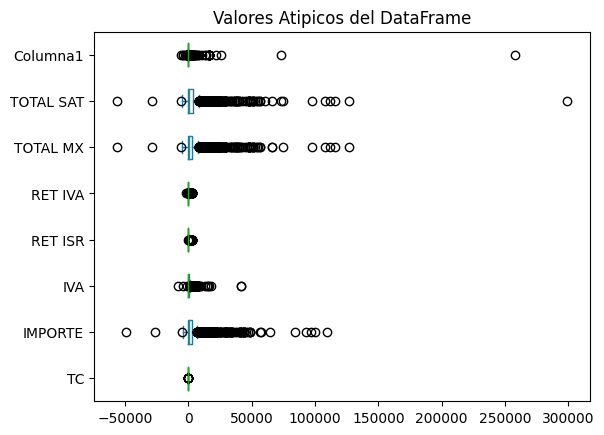

In [60]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,5))
NUMERICAS.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [61]:
#Metodo apliacado cuartiles. Encuentro cuartiles 0.25 y 0.75
y = NUMERICAS
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 -percentile25
Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite Inferior  permitido', Limite_Inferior_iqr)

Limite superior permitido TC              1.00000
IMPORTE      6976.21375
IVA          1170.77250
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
Limite Inferior  permitido TC              1.00000
IMPORTE     -4160.35625
IVA          -687.92750
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


In [ ]:
#Encontramos Outliers del DataFrame
outliers = NUMERICAS[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]

In [63]:
#Obtenemos datos limpios del DataFrame
NUMERICAS_IQR = NUMERICAS[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
NUMERICAS_IQR

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
4,1.0,0.00,NaN,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [64]:
##Remplazamos valores atipicos (nulos) del dataframe con "mean"
NUMERICOS_CLEAN = NUMERICAS_IQR.copy()
NUMERICOS_CLEAN  = NUMERICOS_CLEAN .fillna(round(NUMERICAS_IQR.mean(), 1))
NUMERICOS_CLEAN

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,187.40,0.0,0.0,2248.28,1333.00,0.0
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,1.0,1093.80,187.40,0.0,0.0,1239.10,1333.00,0.0
4,1.0,0.00,187.40,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [69]:
#Unimos la columna 'indice_tiempo on el dataframe
Datos_COMPLETOS = pd.concat([ALFABETICAS, NUMERICOS_CLEAN ], axis=1)
Datos_COMPLETOS

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,COMPRA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,Desconocido,1.0,0.00,187.40,0.0,0.0,2248.28,1333.00,0.0
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,I,Vigente,Desconocido,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.0
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,I,Vigente,Desconocido,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.0
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,COMPRA,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,Desconocido,1.0,1093.80,187.40,0.0,0.0,1239.10,1333.00,0.0
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,COMPRA,Pago,P,Vigente,Desconocido,1.0,0.00,187.40,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,I,Vigente,Desconocido,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.0
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,Desconocido,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,Desconocido,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.0
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,I,Vigente,Desconocido,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [70]:
#Corroborar valores nulos
valores_nulos = Datos_COMPLETOS.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TIPO           0
STATUS         0
POLIZA         0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Columna1       0
dtype: int64

In [72]:
Datos_COMPLETOS.to_csv("2020_clean.csv")
from google.colab import files
files.download("2020_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>